In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import ca_utils as ca


# Theory

# Generate Rule Matrix

the function `rule_arr` generates matrices representing an update rule, for example rule `110` is

In [3]:
ca.rule_arr(110)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

indicating the mapping `(0,0,0)->0`, `(1,0,0)->1`, `(0,1,0)->1` etc.

Non-deterministic rules can be generated by supplying permutaions to a base rule, for example if we perturb rule `110` by 0.1 for each mapping to get

In [4]:
ca.rule_arr(110, list(range(8)), [0.1 for _ in range(8)])

array([[0.9, 0.1],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.9, 0.1]])

then in this case `P(0|0,0,0)=0.9` and `P(1|0,0,0)=0.1` etc.

Or pertubations can be applied to individual indices in a similar way

In [5]:
ca.rule_arr(110, [1], [0.5])

array([[1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ]])

then `P(0|1,0,0)=0.5` and `P(1|1,0,0)=0.5`

## Model Runner

*Note: Currently the model runner only runs for two states*

The model runner takes as arguments:

- An update rule as created by `rule_arr`
- An initial state represented as 1D array. This 1D array should give values for $P(s=1)$
- The number of steps to run the model for

The model returns a 4D array of joint probabilities in the shape:

`[steps, width, s_i, s_i+1]`

for example `[t, i, 0, 0]` corresponds to the joit probability 

$P(S_{i}^{t}=0, S_{i+1}^{t}=0)$

In [6]:
initial_state = np.random.randint(0, 2, size=200)

In [7]:
r = ca.rule_arr(18, list(range(8)), [0.0001 for _ in range(8)])

In [8]:
foo = ca.model_runner(r, 50, initial_state)

Summing over the second axis retrieves the marginal distribution $P(S_{i}^{t})$ which can then be plotted as a 2D array

<Figure size 1440x360 with 0 Axes>

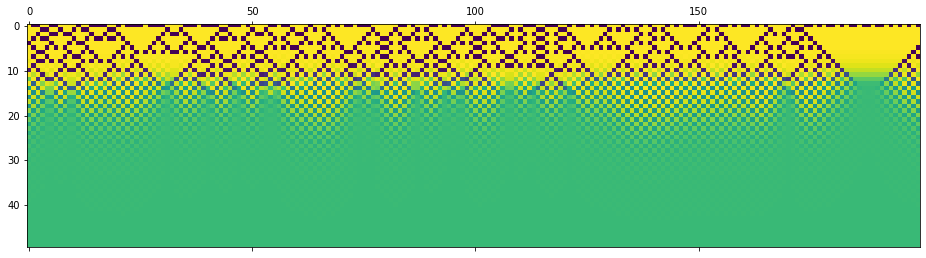

In [9]:
plt.figure(figsize=(20,5));
plt.matshow(foo.sum(axis=2)[:,:, 0]);

## Mutual Information

The module contains a few additional utilities for plotting and analysis. 

In this case the mutual information is a measure of the mutual dependence between neighbouring cells given by

$$
I(X;Y) = \sum_{x,y}P(x,y)log\left(\frac{P(x,y}{P(x)P(y)}\right)
$$

<Figure size 1440x360 with 0 Axes>

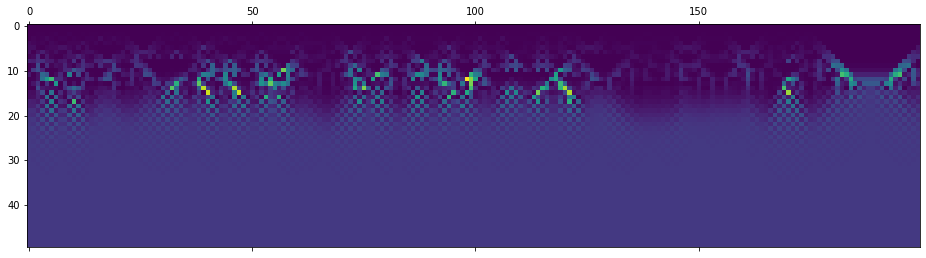

In [10]:
plt.figure(figsize=(20,5));
plt.matshow(ca.mutual_info(foo));

## Entropy

This function produces the entropy of the flattened joint probability distribution

<Figure size 1440x360 with 0 Axes>

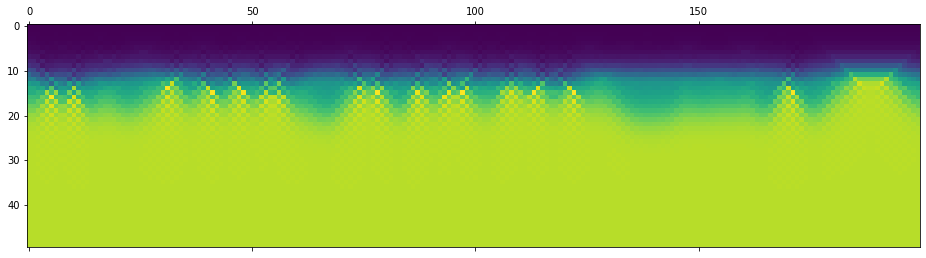

In [11]:
plt.figure(figsize=(20,5));
plt.matshow(ca.flat_joint_entropy(foo));

## Min-Max Scaling

In some cases the relative difference between cells at later steps is much smaller than during the intial steps of the model, causing plots to contain little detail. 

In this case it may also be useful to apply min-max scaling across the rows to highlight the patterns in relative differences between cells.

<Figure size 1440x360 with 0 Axes>

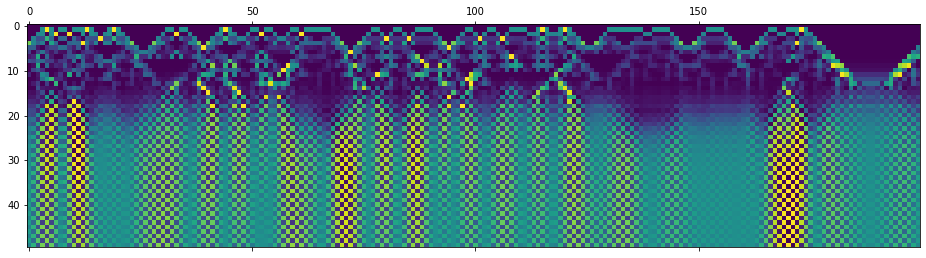

In [12]:
plt.figure(figsize=(20,5));
plt.matshow(ca.min_max_scale_rows(ca.mutual_info(foo)));

## Sanity Checks

The `checks` function runs some basic checks on the resulting array:

- Check that the marginal distributions are consistent when calculated for neighbouring
  joint probability distributions
- Check that all the joint probabilites are normalized

In [13]:
ca.checks(foo)

Ok


## Twin Plot Runner

This is a convenience function that plots both the result of a CA with unperturbed update rule and one with pertubation

In [14]:
def plotter(r, width, steps):
    initial_state = np.random.randint(0, 2, size=width)
    
    rp = ca.rule_arr(r, list(range(8)), [0.00001 for _ in range(8)])
    r0 = ca.rule_arr(r)
    
    arr_p = ca.model_runner(rp, steps, initial_state)
    arr_0 = ca.model_runner(r0, steps, initial_state)
    
    f, ax = plt.subplots(1, 2, figsize=(18, 10*(steps/width)))
      
    ax[0].matshow(arr_0.sum(axis=2)[:,:, 0], cmap=plt.get_cmap('binary'));
    # ax[1].matshow(ca.mutual_info(arr_p));
    # ax[1].matshow(ca.min_max_scale_rows(ca.mutual_info(arr_p)));
    ax[1].matshow(ca.min_max_scale_rows(arr_p.sum(axis=2)[:,:, 0]));
    # ax[1].matshow(arr_p.sum(axis=2)[:,:, 0]);
    
    for i in ax:
        i.set_xticks([])
        i.set_yticks([])
  
    f.tight_layout()

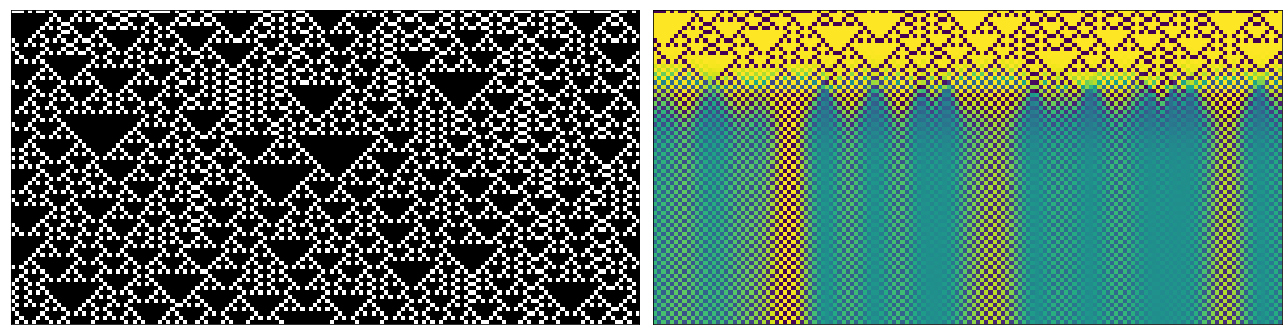

In [15]:
plotter(18, 150, 75)